## Analiza retencji pracowników
Ta analiza nie ma nic wspólnego z drugą analizą o tej samej tematyce!

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/rajeevratan84/datascienceforbusiness/master/hr_data.csv')

In [4]:
df.head()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,1003,2,157,3,0,1,0,sales,low
1,1005,5,262,6,0,1,0,sales,medium
2,1486,7,272,4,0,1,0,sales,medium
3,1038,5,223,5,0,1,0,sales,low
4,1057,2,159,3,0,1,0,sales,low


In [5]:
df.describe()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,45424.627575,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,25915.900127,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,1003.000000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,22872.500000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,45448.000000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,67480.500000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,99815.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   employee_id            14999 non-null  int64 
 1   number_project         14999 non-null  int64 
 2   average_montly_hours   14999 non-null  int64 
 3   time_spend_company     14999 non-null  int64 
 4   Work_accident          14999 non-null  int64 
 5   left                   14999 non-null  int64 
 6   promotion_last_5years  14999 non-null  int64 
 7   department             14999 non-null  object
 8   salary                 14999 non-null  object
dtypes: int64(7), object(2)
memory usage: 1.0+ MB


In [11]:
df.isnull().sum()

employee_id              0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

Mamy 14999 pracowników. Dane są kompletne.

In [10]:
df.select_dtypes(exclude=['int', 'float']).columns

Index(['department', 'salary'], dtype='object')

In [18]:
df['department'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

In [34]:
df['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

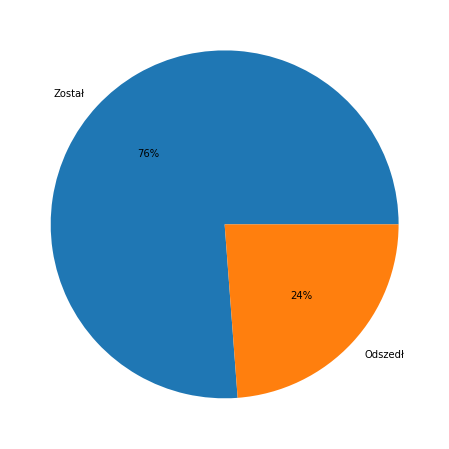

In [43]:
plt.figure(figsize=(12, 8))

plt.pie(df['left'].value_counts(), autopct='%0.0f%%', labels=['Został', 'Odszedł']);

Firmę opuściło 3571 badanych co stanowi 24%.

Mamy do dyspozycji drugą tabelę przedstawiającą tych samych pracowników i ich poziom satysfakicji

In [19]:
sat_df = pd.read_excel('https://raw.githubusercontent.com/rajeevratan84/datascienceforbusiness/master/employee_satisfaction_evaluation.xlsx')
sat_df.head()

,EMPLOYEE #,satisfaction_level,last_evaluation
0,1003,0.38,0.53
1,1005,0.80,0.86
2,1486,0.11,0.88
3,1038,0.72,0.87
4,1057,0.37,0.52


In [20]:
sat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   EMPLOYEE #          14999 non-null  int64  
 1   satisfaction_level  14972 non-null  float64
 2   last_evaluation     14972 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 351.7 KB


Ilość pracowników i ich ID się pokrywają więc połączymy te tabele.

In [22]:
main_df = df.set_index('employee_id').join(sat_df.set_index('EMPLOYEE #'))
main_df = main_df.reset_index()
main_df.head()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,1003,2,157,3,0,1,0,sales,low,0.38,0.53
1,1005,5,262,6,0,1,0,sales,medium,0.80,0.86
2,1486,7,272,4,0,1,0,sales,medium,0.11,0.88
3,1038,5,223,5,0,1,0,sales,low,0.72,0.87
4,1057,2,159,3,0,1,0,sales,low,0.37,0.52


In [24]:
main_df.isnull().sum()

employee_id               0
number_project            0
average_montly_hours      0
time_spend_company        0
Work_accident             0
left                      0
promotion_last_5years     0
department                0
salary                    0
satisfaction_level       27
last_evaluation          27
dtype: int64

Brakujące wartości uzupełnimy wartością średnią. Kolumna employee_id nie będzie potrzebna.

In [25]:
main_df = main_df.fillna(main_df.mean())

C:\Users\sparr\AppData\Local\Temp/ipykernel_960/4240884883.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  main_df = main_df.fillna(main_df.mean())


In [28]:
main_df = main_df.drop(['employee_id'], axis=1)

In [30]:
main_df.groupby('department').sum()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation
department,,,,,,,,
IT,4683,248119,4256,164,273,3,758.17283,879.452250
RandD,3033,158030,2650,134,121,27,487.80000,560.446125
accounting,2934,154292,2702,96,204,14,446.68283,550.706125
hr,2701,146828,2480,89,215,15,442.53566,524.006125
management,2432,126787,2711,103,91,69,391.76566,456.234499
marketing,3164,171073,3063,138,203,43,530.62283,613.946125
product_mng,3434,180369,3135,132,198,0,559.19566,644.662250
sales,15634,831773,14631,587,1014,100,2543.77981,2938.236749
support,8479,447490,7563,345,555,20,1377.90849,1611.534499


In [31]:
main_df.groupby('department').mean()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation
department,,,,,,,,
IT,3.816626,202.215974,3.468623,0.133659,0.222494,0.002445,0.617908,0.716750
RandD,3.853875,200.800508,3.367217,0.170267,0.153748,0.034307,0.619822,0.712130
accounting,3.825293,201.162973,3.522816,0.125163,0.265971,0.018253,0.582377,0.718000
hr,3.654939,198.684709,3.355886,0.120433,0.290934,0.020298,0.598830,0.709075
management,3.860317,201.249206,4.303175,0.163492,0.144444,0.109524,0.621850,0.724182
marketing,3.687646,199.385781,3.569930,0.160839,0.236597,0.050117,0.618442,0.715555
product_mng,3.807095,199.965632,3.475610,0.146341,0.219512,0.000000,0.619951,0.714703
sales,3.776329,200.911353,3.534058,0.141787,0.244928,0.024155,0.614440,0.709719
support,3.803948,200.758188,3.393001,0.154778,0.248991,0.008973,0.618173,0.722985


Dział HR zanotował najwięcej odejść procentowo. Najmniej RandD. 

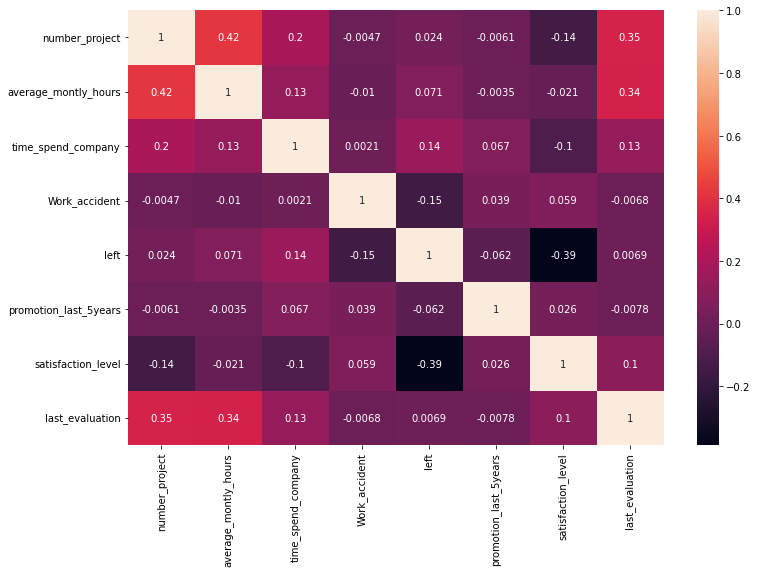

In [44]:
plt.figure(figsize=(12, 8))

df_num = main_df.select_dtypes(exclude=['object'])

sns.heatmap(df_num.corr(), annot=True);

Istnieje niewielka korelacja rezygnacji z czasem pracy. Jak można się spodziewać mamy negatywną korelację z satysfakcją z pracy.
Przygotujemy dane pod ML

In [45]:
ml_df = pd.get_dummies(main_df, drop_first=True, columns=['department', 'salary'])
ml_df.head()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
0,2,157,3,0,1,0,0.38,0.53,0,0,0,0,0,0,1,0,0,1,0
1,5,262,6,0,1,0,0.80,0.86,0,0,0,0,0,0,1,0,0,0,1
2,7,272,4,0,1,0,0.11,0.88,0,0,0,0,0,0,1,0,0,0,1
3,5,223,5,0,1,0,0.72,0.87,0,0,0,0,0,0,1,0,0,1,0
4,2,159,3,0,1,0,0.37,0.52,0,0,0,0,0,0,1,0,0,1,0


In [50]:
X = ml_df.drop(['left'], axis=1)
y = ml_df['left'].values

In [51]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X = scaler.fit_transform(X)

In [52]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [56]:
df_train = pd.DataFrame(X_train)
df_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.971113,-0.561665,-0.341235,-0.411165,-0.147412,-0.413834,-0.796151,-0.235321,-0.232148,-0.227647,-0.209391,-0.246322,-0.252953,-0.617455,2.393538,-0.470655,1.024775,-0.868132
1,-0.651538,-0.681805,-1.026126,-0.411165,-0.147412,1.517901,0.841481,-0.235321,-0.232148,-0.227647,-0.209391,-0.246322,-0.252953,1.619551,-0.417791,-0.470655,1.024775,-0.868132
2,0.159788,0.379438,1.028546,-0.411165,-0.147412,0.994723,-0.796151,-0.235321,-0.232148,-0.227647,-0.209391,-0.246322,-0.252953,-0.617455,-0.417791,2.124697,1.024775,-0.868132
3,0.971113,-1.582861,0.343655,-0.411165,-0.147412,0.109344,-1.965888,-0.235321,-0.232148,-0.227647,-0.209391,-0.246322,-0.252953,1.619551,-0.417791,-0.470655,1.024775,-0.868132
4,-1.462863,-0.061078,-1.026126,-0.411165,-0.147412,0.069100,1.192402,-0.235321,-0.232148,4.392761,-0.209391,-0.246322,-0.252953,-0.617455,-0.417791,-0.470655,1.024775,-0.868132


## Regresja logistyczna

Dokładność: 78.89%

Raport: 
              precision    recall  f1-score   support

           0       0.82      0.93      0.87      3418
           1       0.60      0.35      0.45      1082

    accuracy                           0.79      4500
   macro avg       0.71      0.64      0.66      4500
weighted avg       0.77      0.79      0.77      4500



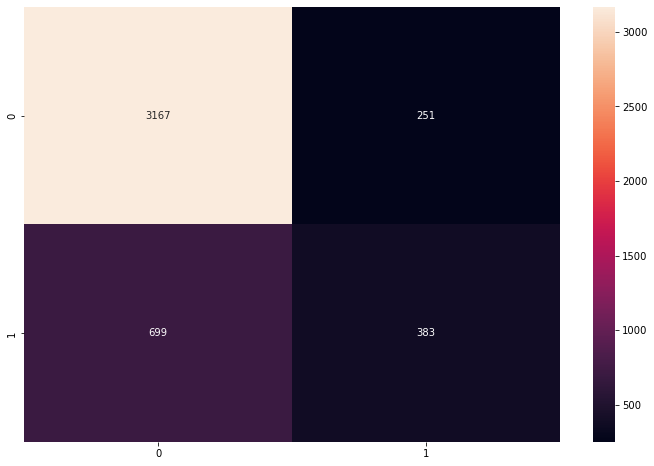

In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
plt.figure(figsize=(12,8))

model = LogisticRegression()
model.fit(X_train, y_train)

prediction = model.predict(X_test)


print(f'Dokładność: {round(100 * accuracy_score(prediction, y_test),2)}%\n' )
print(f'Raport: \n{classification_report(y_test, prediction)}')
sns.heatmap(confusion_matrix(y_test, prediction), annot = True, fmt='.5g' );


## Las losowy

Dokładność: 98.87%

Raport: 
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3418
           1       0.99      0.96      0.98      1082

    accuracy                           0.99      4500
   macro avg       0.99      0.98      0.98      4500
weighted avg       0.99      0.99      0.99      4500



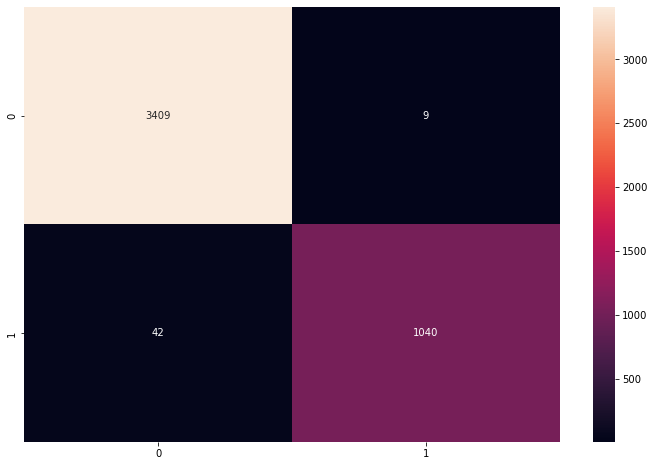

In [74]:
from sklearn.ensemble import RandomForestClassifier
plt.figure(figsize=(12,8))

model = RandomForestClassifier()
model.fit(X_train, y_train)

prediction = model.predict(X_test)


print(f'Dokładność: {round(100 * accuracy_score(prediction, y_test),2)}%\n' )
print(f'Raport: \n{classification_report(y_test, prediction)}')
sns.heatmap(confusion_matrix(y_test, prediction), annot = True, fmt='.5g' );

Model lasu losowego dał bardzo dużą dokładność na poziomie 98,87%.